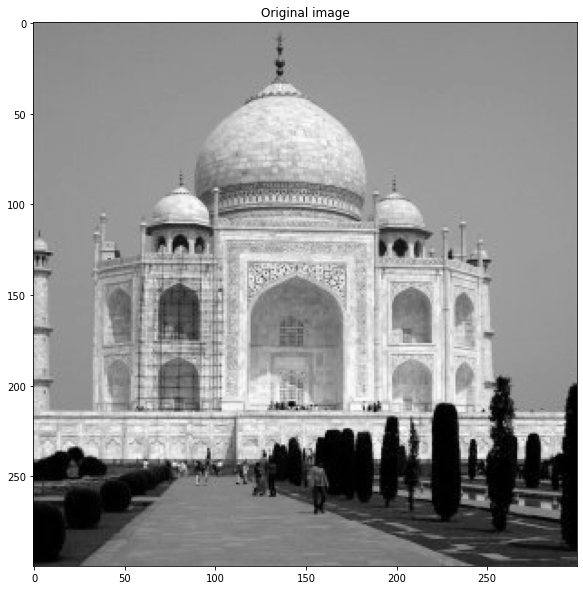

In [ ]:
%matplotlib inline
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://docs.gimp.org/2.8/en/images/filters/examples/taj_orig.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert('L')

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

# convert our image into a numpy array
image = np.asarray(img)

def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()

    return output


def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


def gaussian_kernel(size, sigma=1, verbose=False):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    if verbose:
        plt.imshow(kernel_2D, interpolation='none', cmap='gray')
        plt.title("Kernel ( {}X{} )".format(size, size))
        plt.show()

    return kernel_2D


def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)

 
 
def sobel_edge_detection(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)
 
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
 
    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)
 
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
 
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude
 


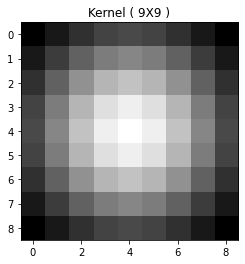

Image Shape : (300, 300)
Kernel Shape : (9, 9)


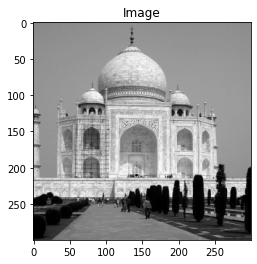

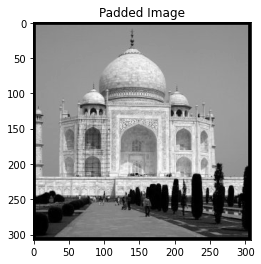

Output Image size : (300, 300)


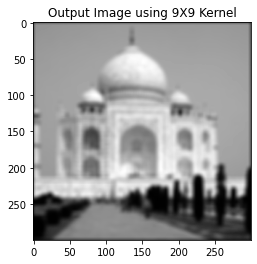

Image Shape : (300, 300)
Kernel Shape : (3, 3)
Output Image size : (300, 300)


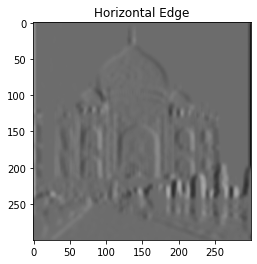

Image Shape : (300, 300)
Kernel Shape : (3, 3)
Output Image size : (300, 300)


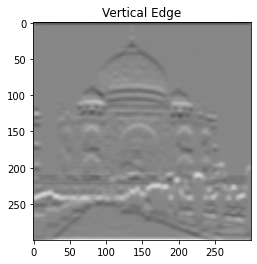

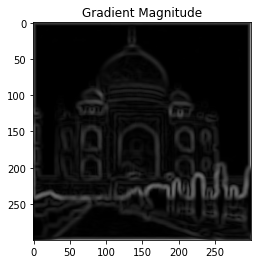

array([[110.5096785 , 122.74687915, 141.22364052, ..., 144.86924133,
        125.84767105, 113.27243043],
       [122.78105918,  62.38139599,  62.54005299, ...,  64.2155768 ,
         64.000508  , 125.85458169],
       [141.36404876,  62.58058111,  58.60955273, ...,  60.24111689,
         64.2303657 , 144.88907419],
       ...,
       [ 10.8636835 ,   5.38836738,   5.29323105, ...,  22.31868133,
         23.96129363,  55.32174572],
       [ 11.77207618,   4.93132619,   4.31213925, ...,  24.65763569,
         24.50521204,  48.08253715],
       [ 11.88484893,  12.53634874,  14.60786851, ...,  54.87937739,
         47.9081732 ,  43.15440696]])

In [ ]:
    filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    image = gaussian_blur(image, 9, verbose=True)
    sobel_edge_detection(image, filter, verbose=True)